In [27]:
# add location of pysda to PATH
import sys
sys.path.append(r"d:\gis\toolboxes\pysda")

In [28]:
# import pysda modules
import sdapoly, sdaprop, sdainterp

In [29]:
# get/set an aoi
myshp = r"F:\ZBOOK\GIS\TEMP\fs.shp"
myaoi = sdapoly.shp(myshp)

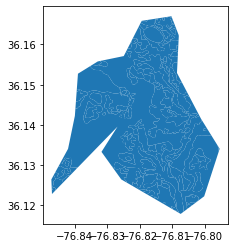

In [30]:
# visualize
%matplotlib inline
myaoi.plot()

In [31]:
# see all properties.  there are 3 functions, numprops, catprops, allprops
# sdaprop.allprops(show = True)

In [32]:
# get SSURGO property, sandtotal_r
wtdavg=sdaprop.getprop(df=myaoi,column='mukey',method='wtd_avg',top=0,bottom=100,prop='sandtotal_r',minmax=None,prnt=False,meta=False)

In [33]:
# remove duplicate columns, join/merge the results, show first record
myaoi_cols = myaoi.columns.tolist()
wtdavg_cols = wtdavg.columns.tolist()
drop_cols = [col for col in wtdavg_cols if col in myaoi_cols and col != 'mukey']
wtdavg.drop(columns = drop_cols, inplace = True)

mymerge = myaoi.merge(wtdavg, how = 'inner', on = 'mukey')
mymerge.head(1)

,areasymbol,areaname,muname,musym,mukey,nat_musym,geometry,sandtotal_r
0,NC015,"Bertie County, North Carolina",Lynchburg sandy loam,Ly,111444,3qyz,"POLYGON ((-76.81374 36.12652, -76.81422 36.12653, -76.81445 36.12663, -76.81450 36.12666, -76.81483 36.12667, -76.81492 36.12671, -76.81497 36.12678, -76.81499 36.12683, -76.81498 36.12692, -76.81494 36.12699, -76.81460 36.12738, -76.81454 36.12750, -76.81450 36.12772, -76.81439 36.12782, -76.81417 36.12781, -76.81401 36.12779, -76.81388 36.12773, -76.81374 36.12764, -76.81365 36.12752, -76.81350 36.12724, -76.81345 36.12685, -76.81341 36.12679, -76.81336 36.12675, -76.81323 36.12669, -76.81334 36.12663, -76.81349 36.12658, -76.81374 36.12652))",60.00


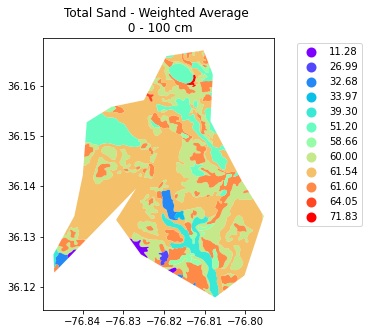

In [34]:
# visualize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
mymerge.plot(column = 'sandtotal_r', ax=ax, cmap = 'rainbow',
            legend = True)

# add a legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4,1.0))
ax.set(title = 'Total Sand - Weighted Average \n 0 - 100 cm')

plt.show()

In [35]:
# same thing, this time an interpretation
# what are interpretations are available?
# sdainterp.showinterps(show = True)

In [36]:
# get interpretation ('ENG - Dwellings W/O Basements')
domcomp = sdainterp.getinterp(myaoi, 'mukey', 'ENG - Dwellings W/O Basements', 'dom_comp')
domcomp

,areasymbol,musym,muname,mukey,rating,class,reason
0,NC015,BB,"Bibb and Johnston loams, frequently flooded",111391,1,Very limited,Depth to saturated zone; Flooding
1,NC015,BoB,"Bonneau loamy sand, 0 to 6 percent slopes",111395,0,Not limited,None
2,NC015,ExA,"Exum very fine sandy loam, 0 to 2 percent slopes",111426,0.386,Somewhat limited,Depth to saturated zone
3,NC015,GoA,"Goldsboro sandy loam, 0 to 3 percent slopes",111435,0.386,Somewhat limited,Depth to saturated zone
4,NC015,Gt,Grantham silt loam,111436,1,Very limited,Depth to saturated zone
5,NC015,Lf,Leaf loam,111442,1,Very limited,Depth to saturated zone; Shrink-swell
6,NC015,Ly,Lynchburg sandy loam,111444,1,Very limited,Depth to saturated zone
7,NC015,Na,Nahunta very fine sandy loam,111451,1,Very limited,Depth to saturated zone
8,NC015,NoA,"Norfolk sandy loam, 0 to 2 percent slopes",111452,0,Not limited,None
9,NC015,NoB,"Norfolk sandy loam, 2 to 6 percent slopes",111453,0,Not limited,None


In [37]:
domcomp_cols = domcomp.columns.tolist()
drop_cols = [col for col in domcomp_cols if col in myaoi_cols and col != 'mukey']
domcomp.drop(columns = drop_cols, inplace = True)

anothermerge = myaoi.merge(domcomp, how = 'inner', on = 'mukey')
anothermerge.head(1)

,areasymbol,areaname,muname,musym,mukey,nat_musym,geometry,rating,class,reason
0,NC015,"Bertie County, North Carolina",Lynchburg sandy loam,Ly,111444,3qyz,"POLYGON ((-76.81374 36.12652, -76.81422 36.12653, -76.81445 36.12663, -76.81450 36.12666, -76.81483 36.12667, -76.81492 36.12671, -76.81497 36.12678, -76.81499 36.12683, -76.81498 36.12692, -76.81494 36.12699, -76.81460 36.12738, -76.81454 36.12750, -76.81450 36.12772, -76.81439 36.12782, -76.81417 36.12781, -76.81401 36.12779, -76.81388 36.12773, -76.81374 36.12764, -76.81365 36.12752, -76.81350 36.12724, -76.81345 36.12685, -76.81341 36.12679, -76.81336 36.12675, -76.81323 36.12669, -76.81334 36.12663, -76.81349 36.12658, -76.81374 36.12652))",1,Very limited,Depth to saturated zone


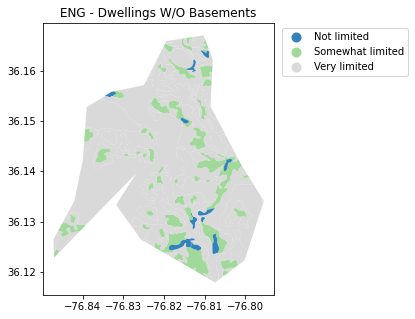

In [38]:
# Visualize
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
anothermerge.plot(column = 'class', ax=ax, cmap = 'tab20c', legend = True)

# add a legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6,1.0))
ax.set(title = 'ENG - Dwellings W/O Basements')

plt.show()